# End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.

### **What is Exploratory Data Analysis (EDA)?**

Exploratory Data Analysis is the crucial process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. It is not about formal modeling or hypothesis testing; rather, it is about getting to know your data before you start building models.

**Why is it important?**
1.  **Understand the Data:** It helps you understand the variables and their relationships.
2.  **Data Cleaning:** It reveals missing values, outliers, and other inconsistencies that need to be handled.
3.  **Feature Selection:** It helps identify which variables are the most important for your problem (feature engineering and selection).
4.  **Assumption Checking:** It allows you to check assumptions that are required for certain machine learning models (e.g., normality, linearity).

In [ ]:
# Importing necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 3.00 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
# Load the dataset
titanic_df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

In [ ]:
# Display the first 5 rows
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Display the last 5 rows
titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
# Checking the dimesions of the dataset (No. of rows, No. of columns)
titanic_df.shape

(891, 12)

In [ ]:
# Concise summary of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Descriptive statistics for numerical columns
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
# Since 'Cabin' column has a lot of null values, checking the entrees of that column
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [ ]:
# Sum of null values in each column
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 'Age', 'Cabin', 'Embarked' have missing values
# Finding the median of 'Age'
median_age=titanic_df['Age'].median()
print(median_age)

28.0


In [ ]:
# To handle missing 'Age' values- we use median
titanic_df['Age']=titanic_df['Age'].fillna(median_age)

In [ ]:
# To verify if there are no null values in 'Age'
print(titanic_df['Age'].isna().sum())

0


In [ ]:
# Finding the mode of 'Embarked'
# [0] is the first most freqent value
mode_embarked=titanic_df['Embarked'].mode()[0]
print(mode_embarked)

S


In [ ]:
# To handle missing 'Embarked' values- we use mode(most frequent value)
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_embarked)

In [ ]:
# To verify if there are no null values in 'Embarked'
print(titanic_df['Embarked'].isna().sum())

0


In [ ]:
# To handle missing 'Cabin' values- we can't use Imputing because there are around 77% null values
# Hence we'll create a new feature called Has_Cabin
titanic_df['Has_Cabin']=titanic_df['Cabin'].notna().astype(int) #1 if it has cabin, 0 if not
# Drop the original column 'Cabin'
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Display the number of null and not null values for 'Has_Cabin'
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [ ]:
# Overview of DataFrame after data cleaning
titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [ ]:
# To verfiy there are no more missing values
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

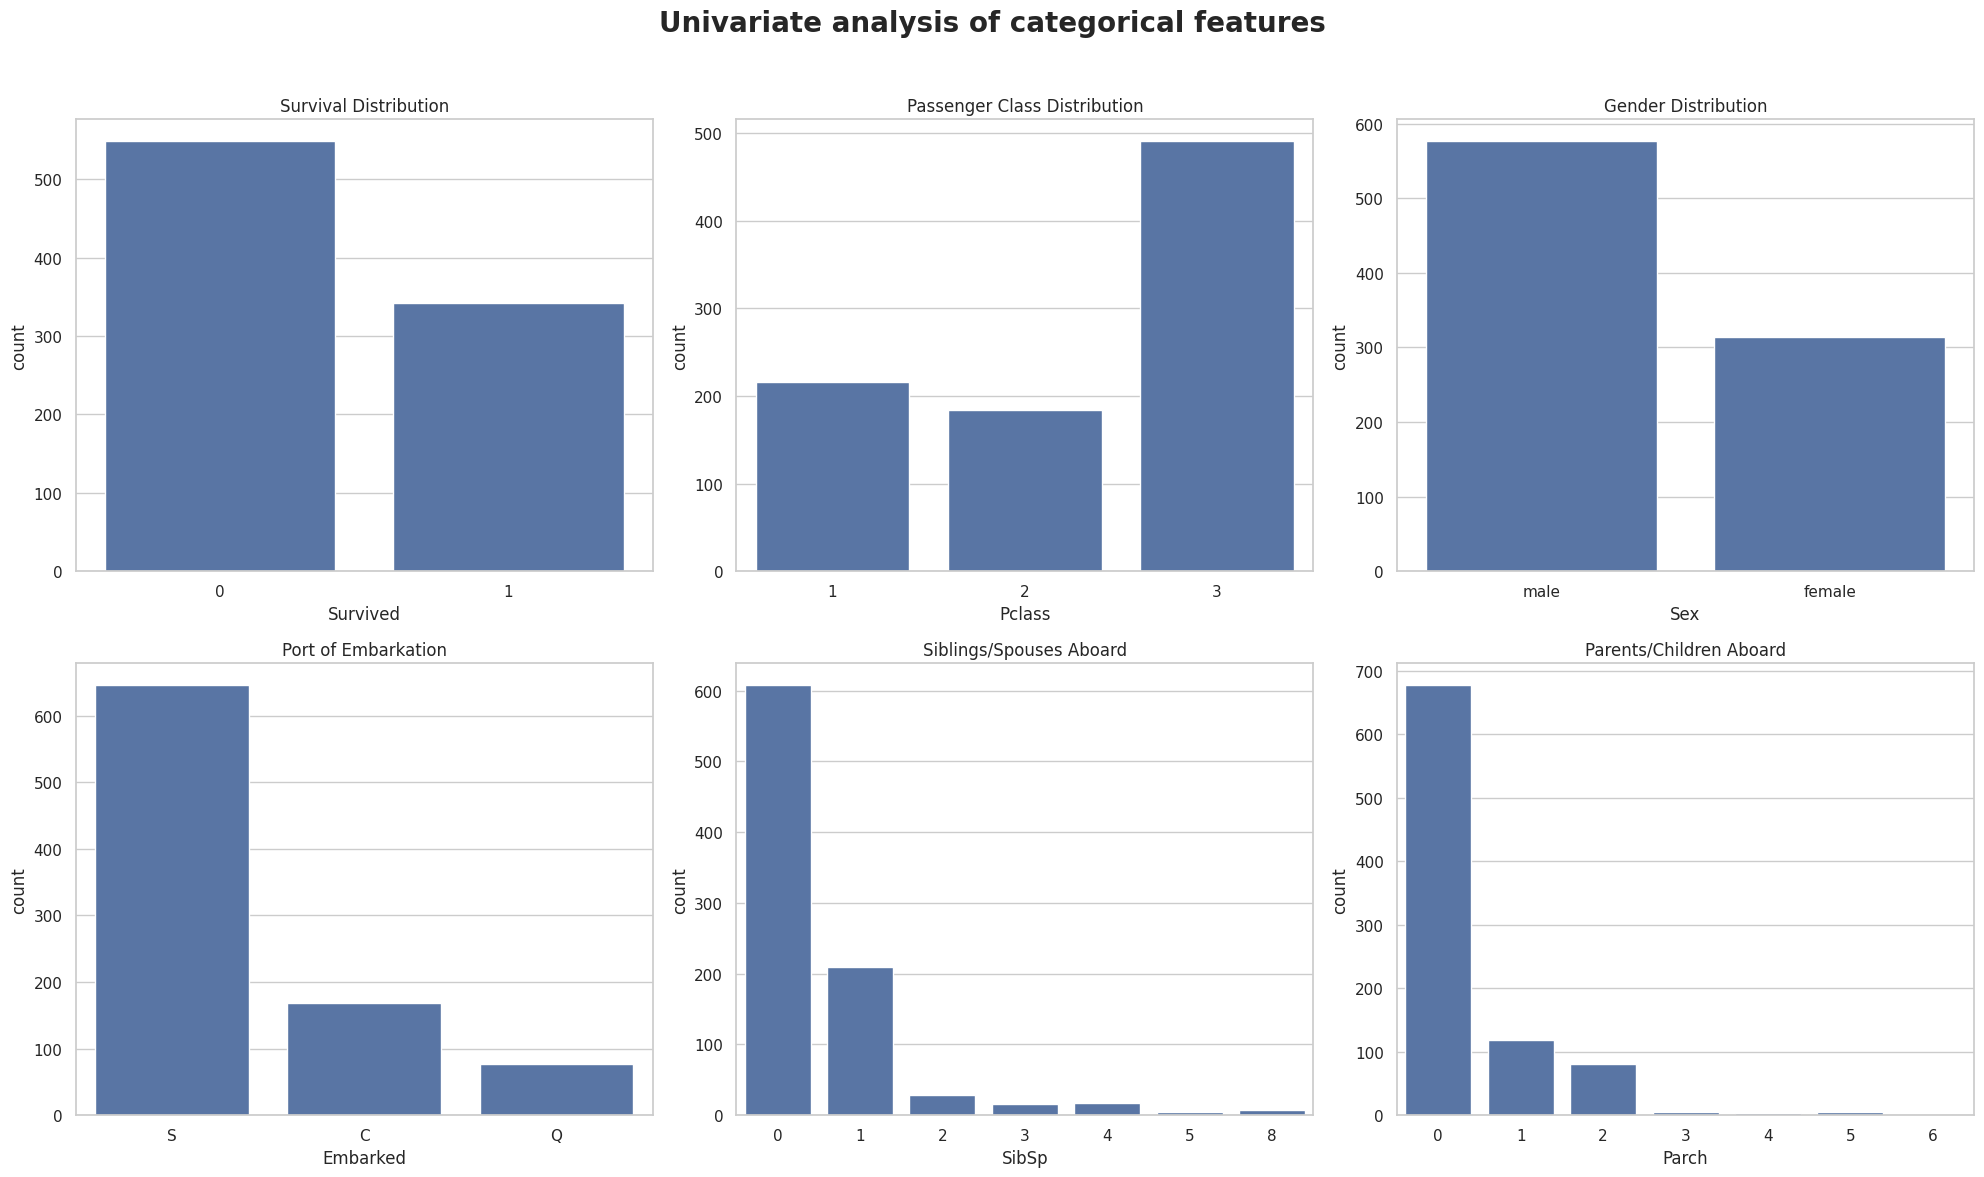

In [ ]:
# Univariate Analysis

# Analyzing categorical features

# Set up the figures for plotting
fig, axes=plt.subplots(2,3,figsize=(20,12))
fig.suptitle("Univariate analysis of categorical features", fontsize=20, fontweight='bold')

# Plotting each categorical value
sns.countplot(ax=axes[0,0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.

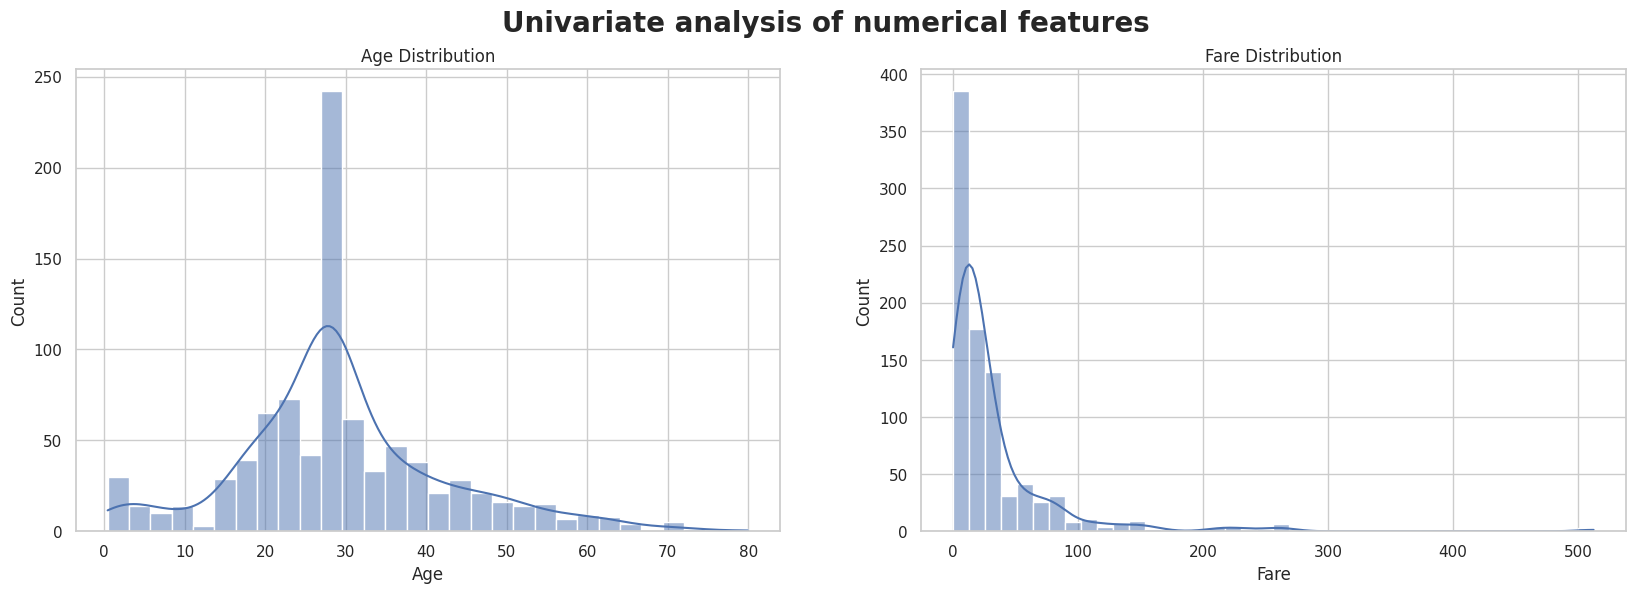

In [ ]:
# Analyzing numerical features

# Set up the figures for plotting
fig, axes=plt.subplots(1,2,figsize=(20,6))
fig.suptitle("Univariate analysis of numerical features", fontsize=20, fontweight='bold')

# Plotting each numerical value
sns.histplot(ax=axes[0], x='Age', data=titanic_df, kde=True, bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1], x='Fare', data=titanic_df, kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

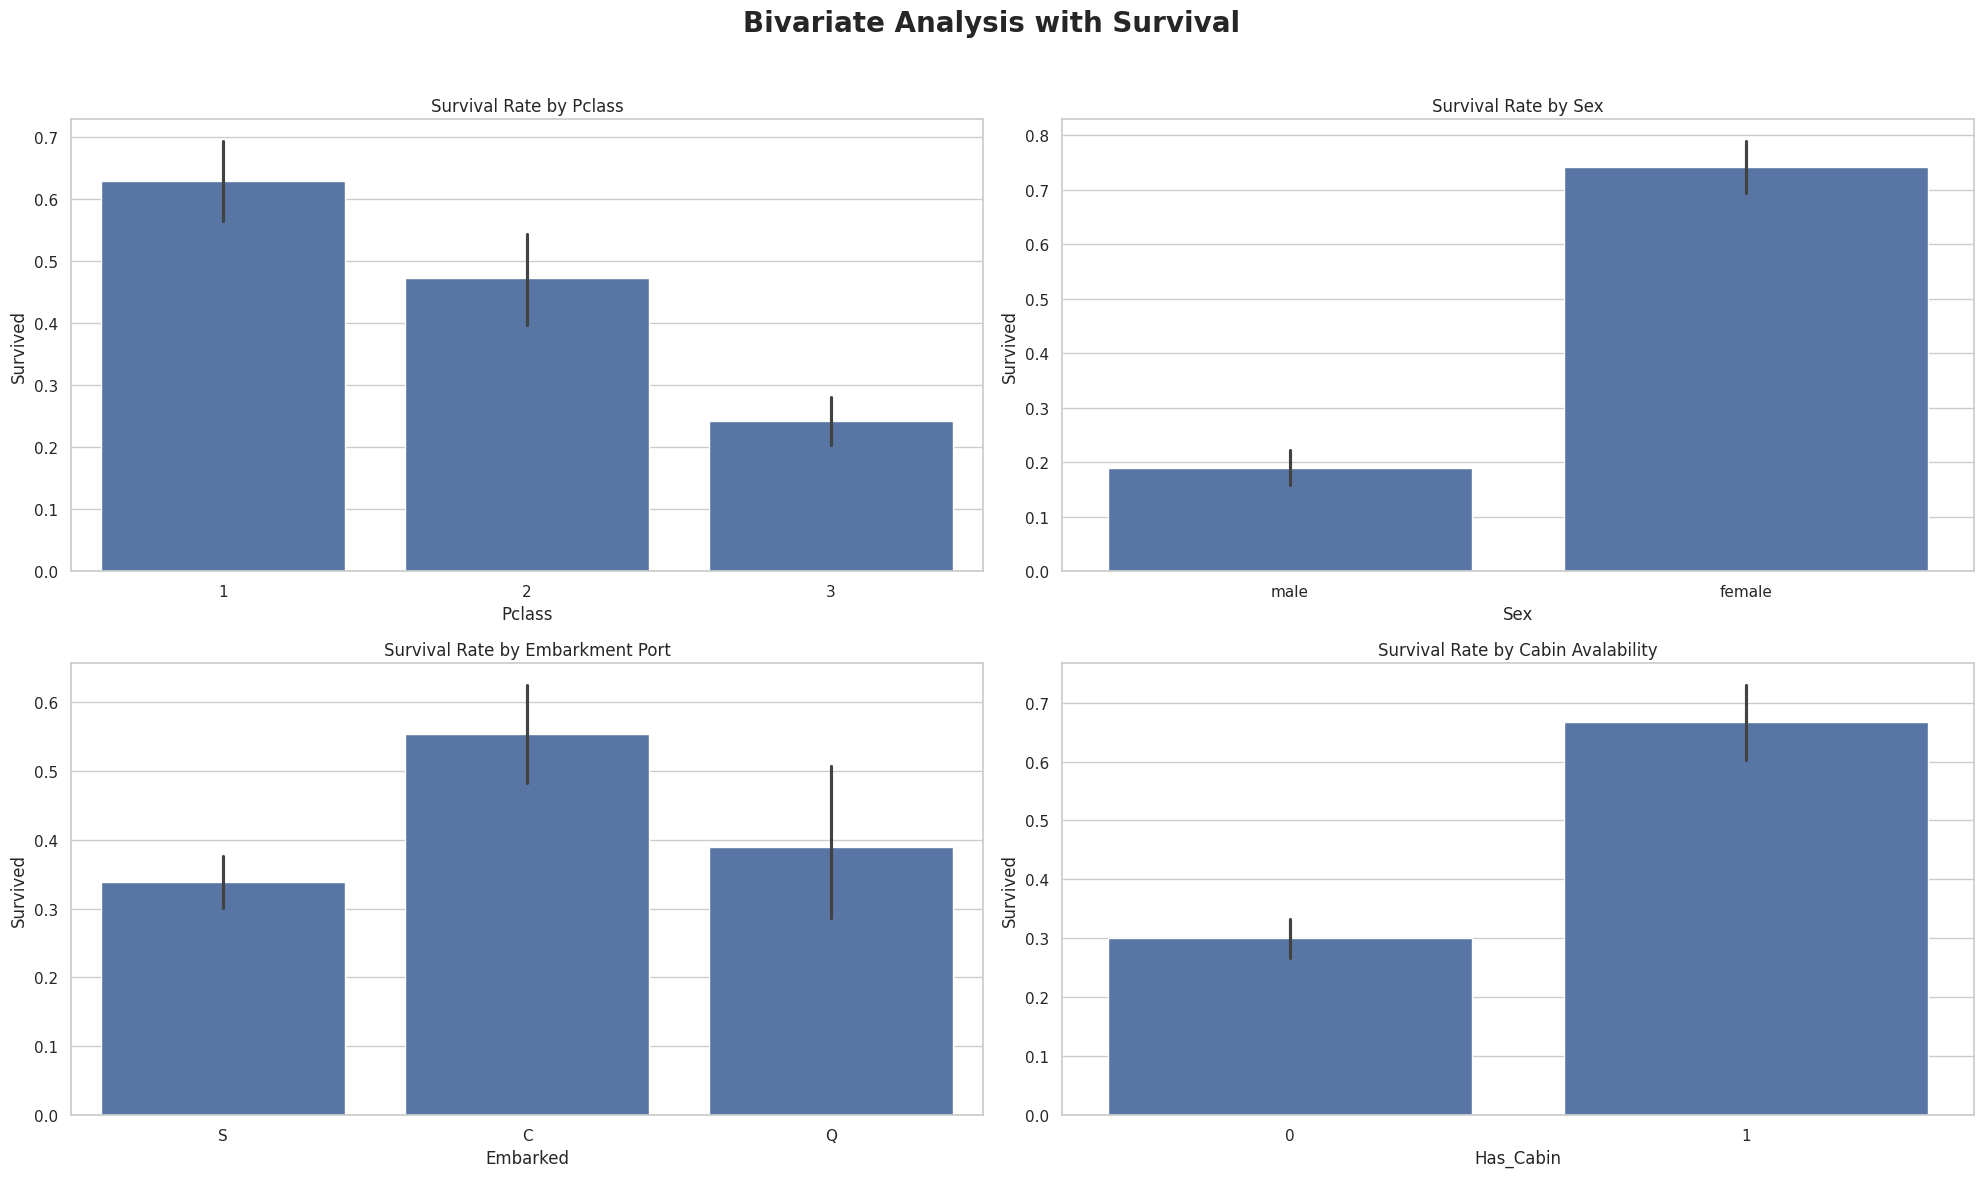

In [ ]:
# Bivariate Analysis

fig, axes=plt.subplots(2,2,figsize=(20,12))
fig.suptitle("Bivariate Analysis with Survival", fontsize=20, fontweight='bold')

# Pclass vs Survived
sns.barplot(ax=axes[0,0], x='Pclass', y='Survived', data=titanic_df, ).set_title('Survival Rate by Pclass')

# Sex vs Survived
sns.barplot(ax=axes[0,1], x='Sex', y='Survived', data=titanic_df, ).set_title('Survival Rate by Sex')

# Embarked vs Survived
sns.barplot(ax=axes[1,0], x='Embarked', y='Survived', data=titanic_df, ).set_title('Survival Rate by Embarkment Port')

# Has_Cabin vs Survived
sns.barplot(ax=axes[1,1], x='Has_Cabin', y='Survived', data=titanic_df, ).set_title('Survival Rate by Cabin Avalability')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

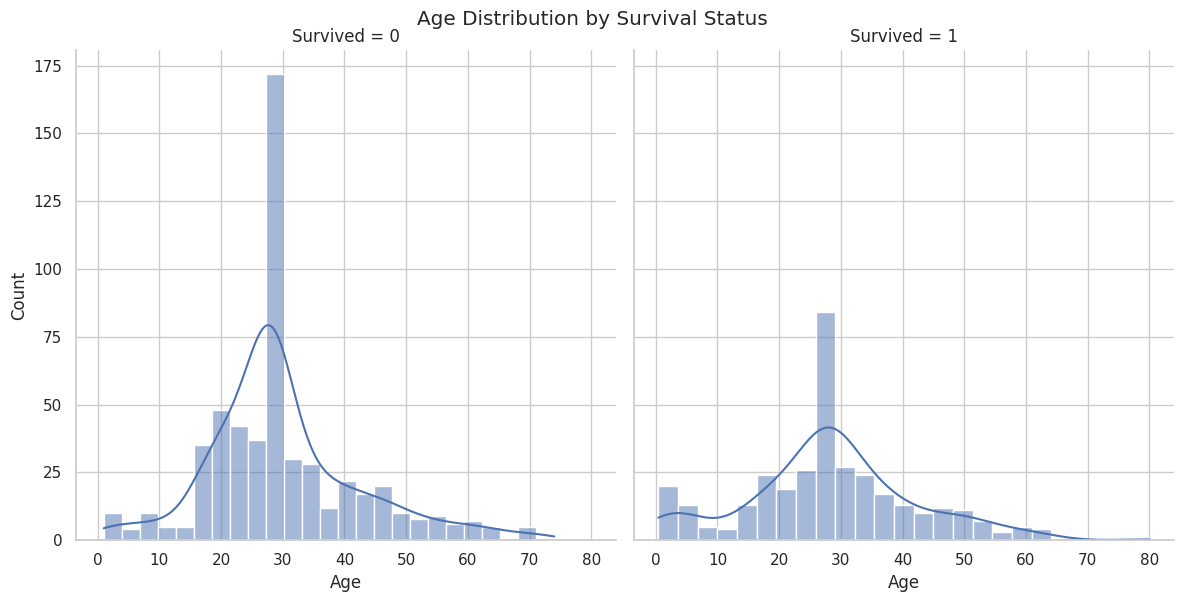

In [ ]:
# Age vs Survival
g=sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1)
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

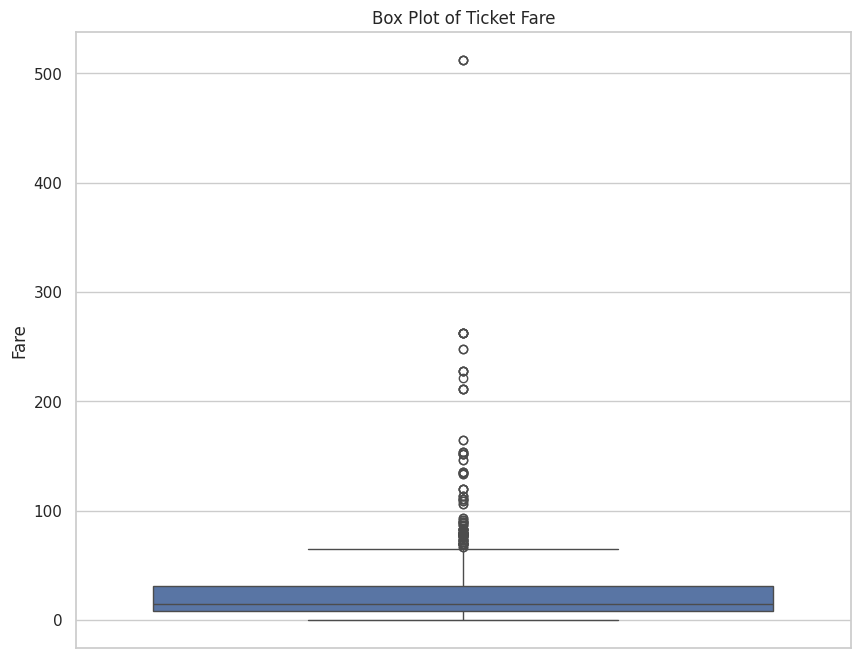

In [ ]:
# Outlier analysis for 'Fare'
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

In [ ]:
# Feature Engineering

# Create a new feature 'FamilySize'
titanic_df['FamilySize']=titanic_df['SibSp']+titanic_df['Parch']+1 #1 for the person themselves

In [ ]:
# Create another new feature 'IsAlone'
titanic_df['IsAlone']=0
titanic_df.loc[titanic_df['FamilySize']==1, 'IsAlone']=1

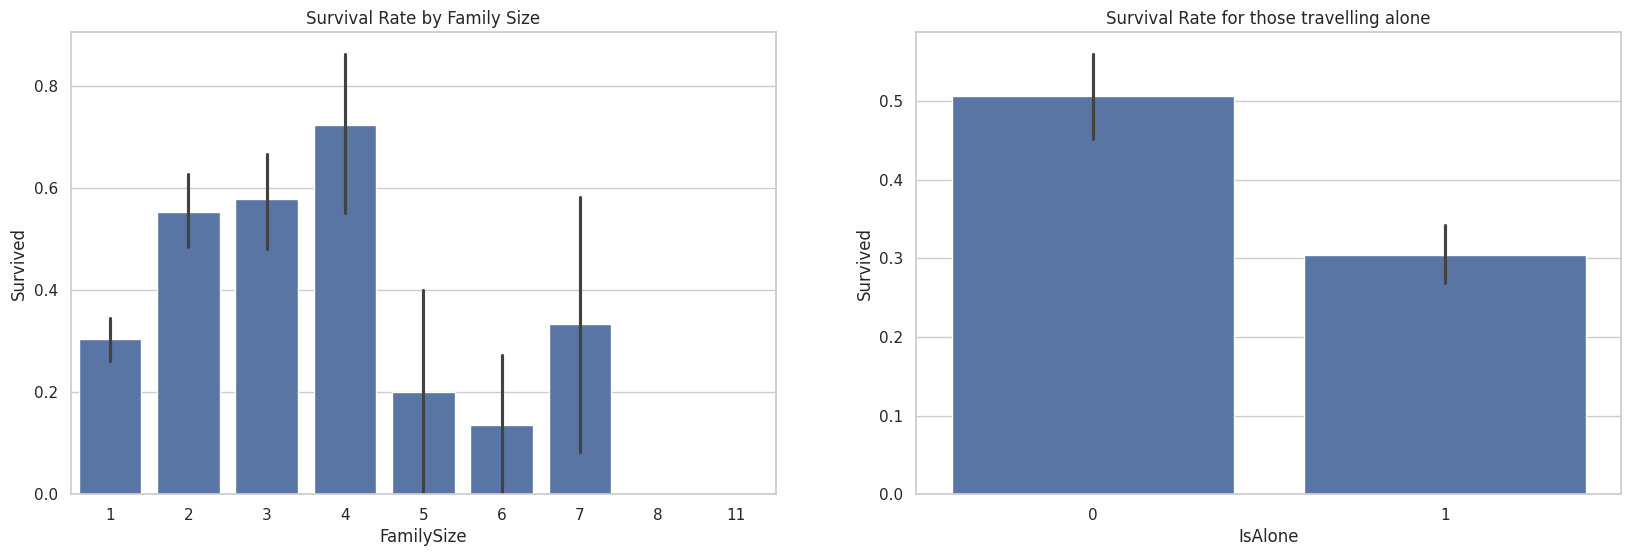

In [ ]:
fig, axes=plt.subplots(1,2,figsize=(20,6))

# Survival Rate vs FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')

# Survival Rate vs IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for those travelling alone')

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [ ]:
# Extract 'Title' from 'Name'
titanic_df['Title']=titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# The different titles
titanic_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
# Group rare titles into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

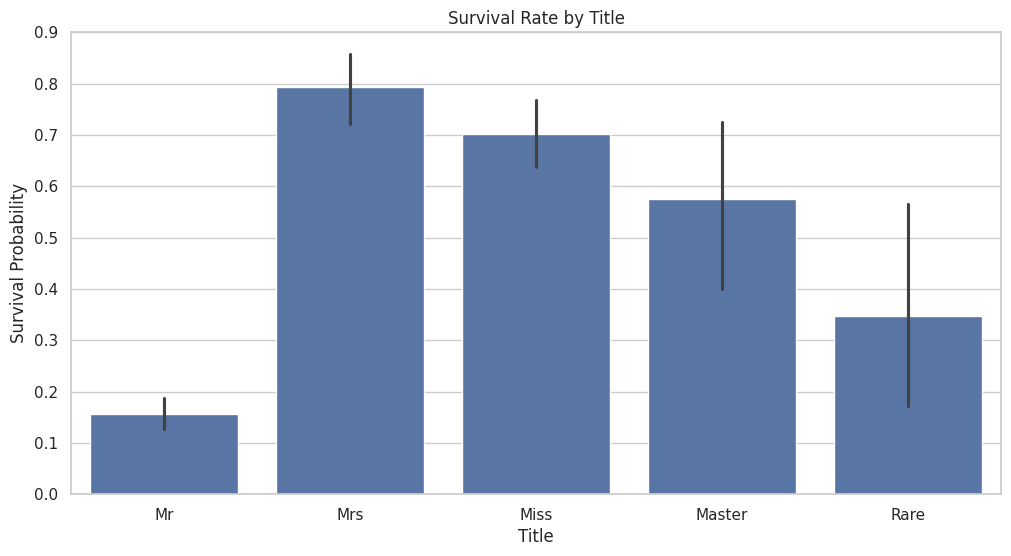

In [ ]:
# Survival Rate vs New and cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

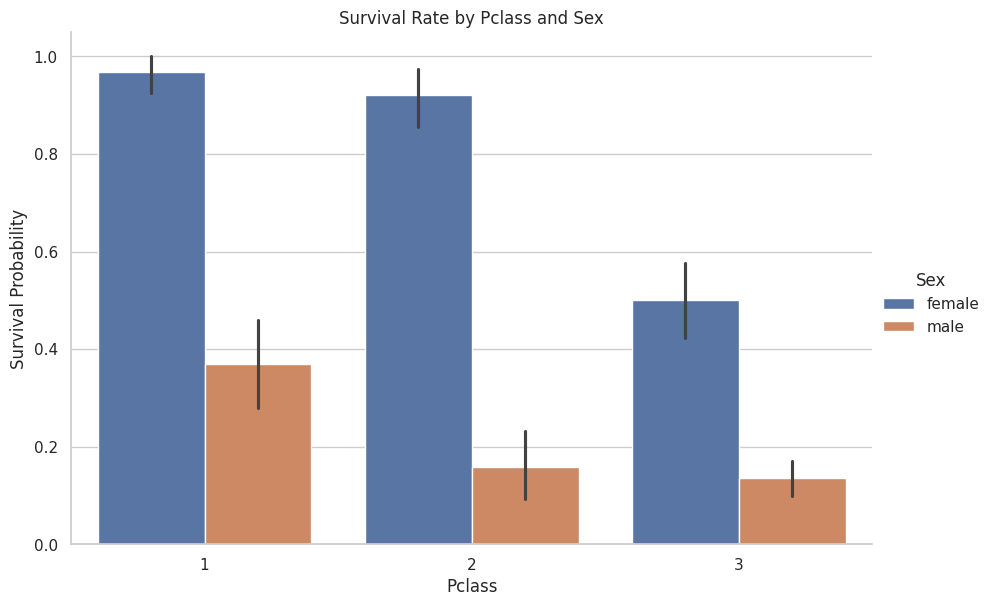

In [ ]:
# Multivariate Analysis

# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

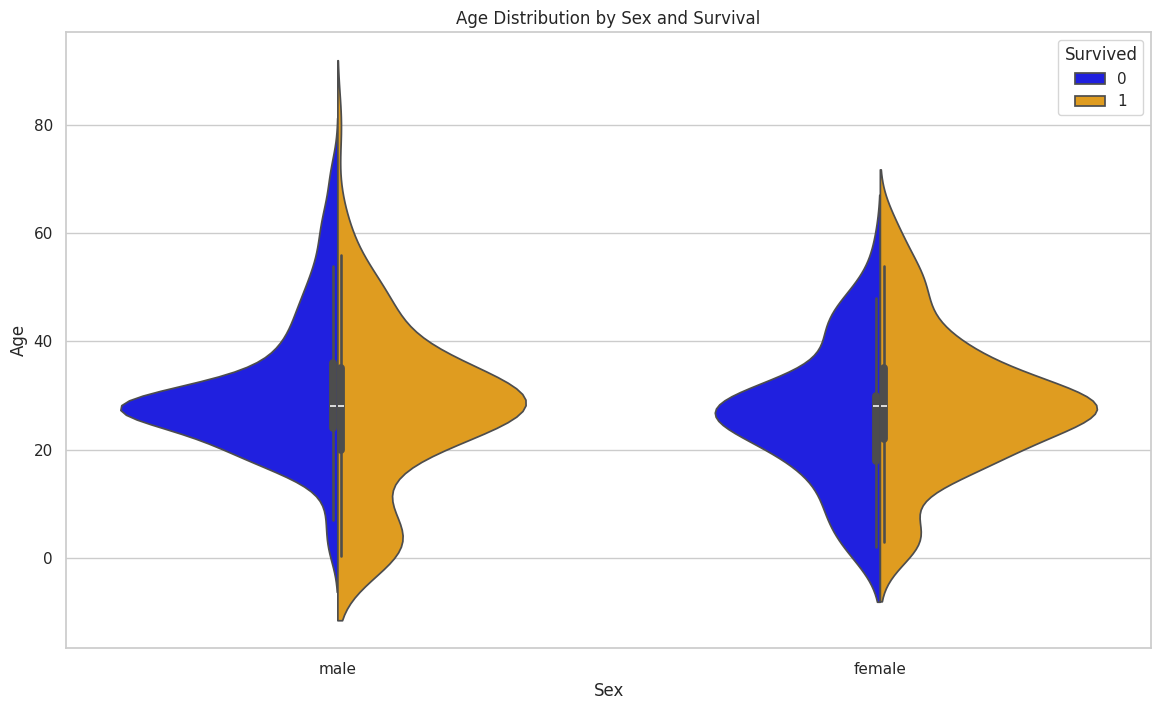

In [ ]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

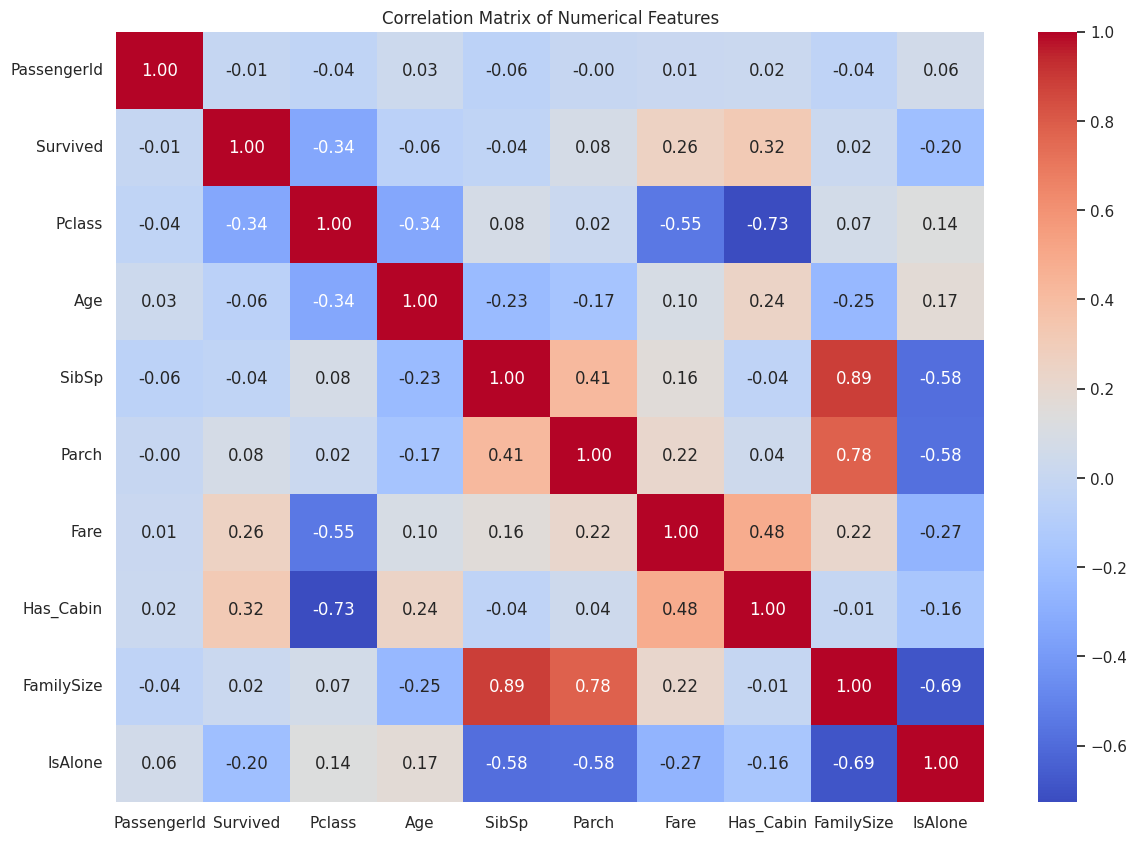

In [ ]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

### Final Conclusion and Summary of Insights

This end-to-end EDA has provided a deep understanding of the Titanic dataset. Our analysis confirms the "women and children first" narrative and highlights the stark social inequalities of the time.

**Key Findings:**
1.  **Strongest Predictors of Survival:**
    - **Title & Sex:** Being female ('Mrs', 'Miss') was the single most significant advantage. Our engineered `Title` feature captures this nuance better than `Sex` alone, also showing that young boys ('Master') had a much higher survival rate than adult men ('Mr').
    - **Passenger Class:** There was a clear survival hierarchy: 1st > 2nd > 3rd class.
    - **Age:** Children and infants had a higher survival rate.

2.  **Other Influential Factors:**
    - **Family Size:** Traveling in a small family (2-4 members) increased survival chances, while traveling alone or in a very large family decreased them.
    - **Fare/Cabin:** Having a cabin (and thus paying a higher fare) was strongly correlated with survival, acting as a proxy for wealth and passenger class.
    - **Port of Embarkation:** Passengers from Cherbourg ('C') had a higher survival rate, possibly because a higher proportion of them were in 1st class.

###**YData Profiling**

In [ ]:
# Install ydata-profiling
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(titanic_df, title="Titanic Dataset Profiling Report")

In [ ]:
# Display the report in the notebook
from IPython.display import display, HTML
display(HTML(profile.to_html()))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 36.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Save the report to an HTML file
profile.to_file("HTML_Report_Titanic.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]